In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
url=r'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

In [3]:
user=pd.read_csv(url)
user.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
user['tip'].mean()

2.99827868852459

In [11]:
user['total_bill'].agg([min,max])

min     3.07
max    50.81
Name: total_bill, dtype: float64

In [12]:
def bill(x):
    if x<9:
        return '0-9'
    elif x>18 and x<=9:
        return '9-18'
    elif x>27 and x<=18:
        return '18-27'
    elif x>36 and x<=27:
        return '27-36'
    elif x>45 and x<=36:
        return '36-45'
    else:
        return '45-54'

In [14]:
user['bill_new']=user['total_bill'].apply(bill)

In [15]:
user.head()

,total_bill,tip,sex,smoker,day,time,size,bill_new
0,16.99,1.01,Female,No,Sun,Dinner,2,45-54
1,10.34,1.66,Male,No,Sun,Dinner,3,45-54
2,21.01,3.50,Male,No,Sun,Dinner,3,45-54
3,23.68,3.31,Male,No,Sun,Dinner,2,45-54
4,24.59,3.61,Female,No,Sun,Dinner,4,45-54


<Axes: xlabel='bill_new', ylabel='count'>

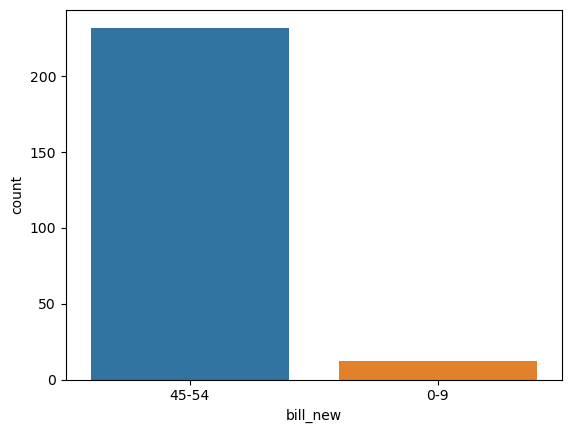

In [17]:
sns.countplot(x=user['bill_new'])

In [19]:
user['tip_perc']=round(user['tip']/user['total_bill']*100,2)
user.head()

,total_bill,tip,sex,smoker,day,time,size,bill_new,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,45-54,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,45-54,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,45-54,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,45-54,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,45-54,14.68


In [23]:
x=user.groupby(['day'])['tip_perc'].median()

In [24]:
x

day
Fri     15.56
Sat     15.18
Sun     16.11
Thur    15.38
Name: tip_perc, dtype: float64

<BarContainer object of 4 artists>

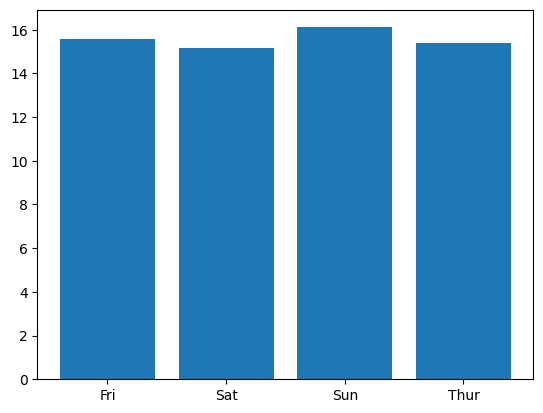

In [25]:
plt.bar(x.index,x)

In [26]:
user.groupby(['time'])['tip'].median()

time
Dinner    3.00
Lunch     2.25
Name: tip, dtype: float64

In [30]:
user[user['time']=='Dinner'].groupby(['size'])['tip'].median()

size
1    1.000
2    2.575
3    3.410
4    3.715
5    4.000
6    5.000
Name: tip, dtype: float64

In [32]:
user.groupby(['day'])['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [34]:
user.groupby(['sex'])['tip'].agg([min,max,'median'])
#user.groupby(['sex'])['tip'].median()

,min,max,median
sex,,,
Female,1.0,6.5,2.75
Male,1.0,10.0,3.00


In [42]:
user.groupby(['day','time'])['tip'].agg([min,max,'median'])

min    max  median
day  time                       
Fri  Dinner  1.00   4.73    3.00
     Lunch   1.58   3.48    2.20
Sat  Dinner  1.00  10.00    2.75
Sun  Dinner  1.01   6.50    3.15
Thur Dinner  3.00   3.00    3.00
     Lunch   1.25   6.70    2.30

In [44]:
user.groupby(['smoker'])['tip_perc'].mean()

smoker
No     15.932318
Yes    16.319140
Name: tip_perc, dtype: float64

In [46]:
user.groupby(['smoker','time'])['tip'].median()

smoker  time  
No      Dinner    3.00
        Lunch     2.18
Yes     Dinner    3.00
        Lunch     2.50
Name: tip, dtype: float64

In [47]:
user.groupby(['time'])['tip'].median()

time
Dinner    3.00
Lunch     2.25
Name: tip, dtype: float64

In [48]:
user.groupby(['size'])['total_bill'].median()

size
1     7.915
2    15.370
3    20.365
4    25.890
5    29.850
6    32.050
Name: total_bill, dtype: float64

In [49]:
def service(x):
    if x<4:
        return 'Bad'
    elif x>4 and x<=7:
        return 'Good'
    else:
        return 'Excellent'

In [50]:
user['level_of_service']=user['tip'].apply(service)
user.head()

,total_bill,tip,sex,smoker,day,time,size,bill_new,tip_perc,level_of_service
0,16.99,1.01,Female,No,Sun,Dinner,2,45-54,5.94,Bad
1,10.34,1.66,Male,No,Sun,Dinner,3,45-54,16.05,Bad
2,21.01,3.50,Male,No,Sun,Dinner,3,45-54,16.66,Bad
3,23.68,3.31,Male,No,Sun,Dinner,2,45-54,13.98,Bad
4,24.59,3.61,Female,No,Sun,Dinner,4,45-54,14.68,Bad


In [51]:
user.groupby(['level_of_service'])['tip'].median()

level_of_service
Bad          2.34
Excellent    4.00
Good         5.00
Name: tip, dtype: float64

In [52]:
def days(x):
    if x=='Sun' or x=='Sat':
        return 'weekends'
    else:
        return 'weekdays'

In [53]:
user['weeks']=user['day'].apply(days)
user.head()

,total_bill,tip,sex,smoker,day,time,size,bill_new,tip_perc,level_of_service,weeks
0,16.99,1.01,Female,No,Sun,Dinner,2,45-54,5.94,Bad,weekends
1,10.34,1.66,Male,No,Sun,Dinner,3,45-54,16.05,Bad,weekends
2,21.01,3.50,Male,No,Sun,Dinner,3,45-54,16.66,Bad,weekends
3,23.68,3.31,Male,No,Sun,Dinner,2,45-54,13.98,Bad,weekends
4,24.59,3.61,Female,No,Sun,Dinner,4,45-54,14.68,Bad,weekends


In [54]:
user.groupby(['weeks'])['tip'].median()

weeks
weekdays    2.5
weekends    3.0
Name: tip, dtype: float64

In [56]:
user.groupby(['size'])['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64